In [ ]:
# Ini pake data MNIST
# Data ini emang udah kesimpan di keras library jadi bisa langsung dipanggil
# Nah klo misalnya nia mau import data lain, harus dipanggil dulu

In [ ]:
import tensorflow as tf

In [ ]:
# Load build in dataset
(X_train, y_train),(X_test, y_test)= tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
# coba panggil X_train[0]. tapi ini masi versi pixel. makanya kita harus import matplotlib library
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
import matplotlib.pyplot as plt

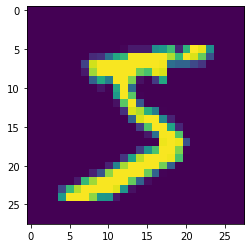

In [ ]:
# Coba tunjukin X_train[0] pake plt
plt.imshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train.shape

# ini nunjukkin klo misalnya dia punya 60000 pic yang ukuran 28x28 px

(60000, 28, 28)

In [ ]:
# tapi klo pake LeNet architecture, itu harus 1*28*28.
# Jadi, biar bisa, harus kita akalin, jadi 1*28*28 + 1.
# makanya harus di reshape

# fokus kita reshape X_train.shape[0] alias si 60000 nya

X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

In [ ]:
X_train.shape

# hasilnya nunjukin klo misalnya mereka dianggap sebagai 1 channel.
# jadi anggapanny ada 1 channel yang ukurannya 60000*28*28

(60000, 28, 28, 1)

In [ ]:
# karna datanya blm di normalized, rangenya masih 0-255.
# Kenapa harus di normalized? to stabilize the gradient descent -> larger learning rates

X_train = X_train/255
X_test = X_test/255 # this is for data validation

In [ ]:
# Now let's built our CNN
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D

In [ ]:
# panduan jumlah angkanya bisa dilihat di LeNet5
model = Sequential()

model.add(Conv2D(25,kernel_size = (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=2))
model.add(Conv2D(30, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides=2))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


# sebenarnya, dengan perkembangan zaman tuh activation yang bisa kita pake tuh beda2
# last year, yang paling bagus itu soft max.
# Sekarang, relu. Nah, klo sekarang masi pake softmax, kayaknya it is so last year

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 30)        6780      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 30)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 750)               0         
                                                                 
 dense (Dense)               (None, 100)               7

In [ ]:
# Klo di ML ini namanya 'model.fit'. Nah klo di DL, habis di compile, baru bakal model fitting
# Biar bisa di fit, kita harus bisa ubah resultnya (y_train) yang format awalnya integer jadi binary class matrix

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)

In [ ]:
# Setelah itu model bakal di compile untuk cari lossnya berapa dan bisa di optimize
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
model.fit(x=X_train, y=y_train, epochs = 10, batch_size = 50)

Epoch 1/10
1200/1200 [==============================] - 47s 38ms/step - loss: 0.1861 - accuracy: 0.9424
Epoch 2/10
1200/1200 [==============================] - 49s 41ms/step - loss: 0.0587 - accuracy: 0.9815
Epoch 3/10
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0414 - accuracy: 0.9871
Epoch 4/10
1200/1200 [==============================] - 45s 38ms/step - loss: 0.0317 - accuracy: 0.9901
Epoch 5/10
1200/1200 [==============================] - 44s 37ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 6/10
1200/1200 [==============================] - 45s 37ms/step - loss: 0.0190 - accuracy: 0.9943
Epoch 7/10
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0162 - accuracy: 0.9949
Epoch 8/10
1200/1200 [==============================] - 40s 34ms/step - loss: 0.0143 - accuracy: 0.9953
Epoch 9/10
1200/1200 [==============================] - 42s 35ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 10/10
1200/1200 [==============================] - 41s 35m

In [ ]:
# Hasil training (weights) sebenarnya bisa langsung di simpan jadi nda perlu training ulang lagi
# bisa pake model.save
# cara manggil modelnya tinggal load model
# See the directory from the previous class

In [ ]:
y_test = to_categorical(y_test)

In [ ]:
model.evaluate(X_test, y_test)

# klo evaluate, dia predict the result of X_test, terus dicocokin sama hasil y_test

313/313 [==============================] - 2s 4ms/step - loss: 0.0315 - accuracy: 0.9919


[0.03154149651527405, 0.9919000267982483]

In [ ]:
# The model is 99.19% accurate on test data